# Увеличение выручки в интернет-магазине с помощью А/B-тестирования

## Описание и задачи исследования

# Цель исследования

Провести A/B-тест в интернет-магазине на основе выдвинутых гипотез отделом маркетинга с целью увеличения выручки.

# Описание данных

Файл `hypothesis.csv`:

Столбцы:

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Чем больше значение `Efforts`, тем дороже проверка гипотезы.

В файле представлены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Файл `orders.csv`:

Столбцы:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv`:

Столбцы:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

# Источник данных

В датасете представлены данные по совершенным заказам и посетителям из интернет-магазина.

# Задачи исследования

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Открытие данных

Импортируем все необходимые нам библиотеки и настройки `Pandas` для отображения данных при выводе:

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import scipy.stats as st
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib
register_matplotlib_converters()


pd.set_option('display.max_columns', None) # отобразим все колонки таблицы
pd.set_option('display.max_colwidth', None) # отобразим максимальную ширину столбца

# округлим числовые значения до сотых, дабы избержать экспоненциального формата данных
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["axes.formatter.limits"] = (-99, 99) #disable scientific notation on axes

plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams["axes.formatter.useoffset"] = False

Прочитаем файлы из папки `/datasets`.

In [2]:
path = '/datasets/'
web_path = '****'
data_1 = 'hypothesis.csv'
data_2 = 'orders.csv'
data_3 = 'visitors.csv'

try:
    raw_hypothesis = pd.read_csv(path + data_1)
    raw_orders = pd.read_csv(path + data_2)
    raw_visitors = pd.read_csv(path + data_3)
except:
    raw_hypothesis = pd.read_csv(web_path + data_1)
    raw_orders = pd.read_csv(web_path + data_2)
    raw_visitors = pd.read_csv(web_path + data_3)

In [3]:
raw_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
raw_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Выведем на экран 5 случайных строк каждой из таблиц:

In [6]:
raw_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
raw_orders.sample(5)

,transactionId,visitorId,date,revenue,group
1168,2015722678,2223522147,2019-08-14,1799,B
542,3049238571,2710478747,2019-08-20,10485,A
909,1062393,2661240577,2019-08-05,6420,A
0,3667963787,3312258926,2019-08-15,1650,B
771,1670357589,1774856294,2019-08-05,1460,B


In [8]:
raw_visitors.sample(5)

,date,group,visitors
27,2019-08-28,A,594
14,2019-08-15,A,628
11,2019-08-12,A,595
29,2019-08-30,A,490
0,2019-08-01,A,719


### Вывод

Предварительно можно сказать, что в датафреймах `orders` и `visitors` следуют привести столбец `date` к `datetime64`, помимо этого, очень желательно привести названия столбцов  к «змеиному регистру» в датафреймах `hypothesis` и `orders`. Из положительных моментов - в данных отсутсвуют пропуски.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
Отличный предварительный анализ


## Предобработка данных

Проведем стандартную предобработку, включающаю проверку явных дубликатов, нулевых и пропущенных значений, а также изменим тип данных и преобразуем категориальные переменные.

Проверим данные на наличие аномалий.

Приведем возможные причины, догадки и аргументы касательно заполнения или удаления значений.

In [9]:
hypothesis = raw_hypothesis.copy()
orders = raw_orders.copy()
visitors = raw_visitors.copy()

### Преобразование названий столбцов

In [10]:
hypothesis.columns = hypothesis.columns.str.replace("Id", "_Id").str.lower()
orders.columns = orders.columns.str.replace("Id", "_Id").str.lower()

In [11]:
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


In [12]:
orders.sample()

,transaction_id,visitor_id,date,revenue,group
66,4919758,1217561296,2019-08-01,2350,B


### Преобразование типов данных

In [13]:
orders['date'] = orders['date'].map(
    lambda x: datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь даты имееют соответсвующий тип данных.

### Обработка дубликатов

In [16]:
print(f"Количество явных дубликатов в orders: {orders.duplicated().sum()}. Доля: {orders.duplicated().sum()/orders.shape[0]:.3%}.")

Количество явных дубликатов в orders: 0. Доля: 0.000%.


In [17]:
print(f"Количество явных дубликатов в visitors: {visitors.duplicated().sum()}. Доля: {visitors.duplicated().sum()/visitors.shape[0]:.3%}.")

Количество явных дубликатов в visitors: 0. Доля: 0.000%.


### Обработка пропущенных значений


In [18]:
pd.concat([orders.isna().sum(), orders.isna().mean()],
          axis=1, keys=['sum', 'conversation']).style.format({'conversation': '{:.2%}'}).background_gradient('coolwarm')

,sum,conversation
transaction_id,0,0.00%
visitor_id,0,0.00%
date,0,0.00%
revenue,0,0.00%
group,0,0.00%


In [19]:
pd.concat([visitors.isna().sum(), visitors.isna().mean()],
          axis=1, keys=['sum', 'conversation']).style.format({'conversation': '{:.2%}'}).background_gradient('coolwarm')

,sum,conversation
date,0,0.00%
group,0,0.00%
visitors,0,0.00%


Как и ранее было сказано, прропуски отсутсвуют.

### Обработка нулевых значений

Создадим таблицы с указанием доли нулевых значений по каждой колонке.

In [20]:
pd.concat([orders.eq(0).sum(), orders.eq(0).mean()],
          axis=1, keys=['sum', 'conversation']).style.format({'conversation': '{:.2%}'}).background_gradient('coolwarm')

,sum,conversation
transaction_id,0,0.00%
visitor_id,0,0.00%
date,0,0.00%
revenue,0,0.00%
group,0,0.00%


In [21]:
pd.concat([visitors.eq(0).sum(), visitors.eq(0).mean()],
          axis=1, keys=['sum', 'conversation']).style.format({'conversation': '{:.2%}'}).background_gradient('coolwarm')

,sum,conversation
date,0,0.00%
group,0,0.00%
visitors,0,0.00%


Аналогично и с нулевыми значениями.

### Анализ данных на наличие аномальных значений

In [22]:
print(f"Начальная дата журнала покупателей: {orders['date'].min()}.")
print(f"Конечная дата журнала покупателей: {orders['date'].min()}.")
print(f"Количество дней в исследуемом периоде в orders: {len(orders['date'].unique())}.")
print()
print(f"Начальная дата журнала посетителей: {visitors['date'].min()}.")
print(f"Конечная дата журнала посетителей: {visitors['date'].min()}.")
print(f"Количество дней в исследуемом периоде в visitors: {len(visitors['date'].unique())}.")
print()
print(f"Группы, участвующие в тестировании в orders: {orders['group'].unique()}. Количество: {orders['group'].nunique()}.")
print(f"Группы, участвующие в тестировании в visitors: {visitors['group'].unique()}. Количество: {visitors['group'].nunique()}.")
print()
print(f"Количество покупателей в группе А: {len(orders[orders['group']=='A']['visitor_id'].unique())}.")
print(f"Количество покупателей в группе B: {len(orders[orders['group']=='B']['visitor_id'].unique())}.")
print(f"Количество покупателей, попадающих в обе группы теста: {orders[orders['group'] == 'A']['visitor_id'].isin(orders[orders['group'] == 'B']['visitor_id']).sum(axis=0)}.")
print()
print(f"Количество посетителей в группе А: {visitors[visitors['group']=='A']['visitors'].sum()}.")
print(f"Количество посетителей в группе B: {visitors[visitors['group']=='B']['visitors'].sum()}.")
print()
print(f"Количество совершенных покупок в группе А: {len(orders[orders['group']=='A']['transaction_id'].unique())}.")
print(f"Количество совершенных покупок в группе B: {len(orders[orders['group']=='B']['transaction_id'].unique())}.")

Начальная дата журнала покупателей: 2019-08-01 00:00:00.
Конечная дата журнала покупателей: 2019-08-01 00:00:00.
Количество дней в исследуемом периоде в orders: 31.

Начальная дата журнала посетителей: 2019-08-01 00:00:00.
Конечная дата журнала посетителей: 2019-08-01 00:00:00.
Количество дней в исследуемом периоде в visitors: 31.

Группы, участвующие в тестировании в orders: ['B' 'A']. Количество: 2.
Группы, участвующие в тестировании в visitors: ['A' 'B']. Количество: 2.

Количество покупателей в группе А: 503.
Количество покупателей в группе B: 586.
Количество покупателей, попадающих в обе группы теста: 89.

Количество посетителей в группе А: 18736.
Количество посетителей в группе B: 18916.

Количество совершенных покупок в группе А: 557.
Количество совершенных покупок в группе B: 640.


Распределение по группам не нормальное, т.к. группа B имеет явный перевес. Также имеются покупатели, которые попали в обе группы тестирования.

Проведем корреляционный анализ, используя функцию `describe`.

In [23]:
orders.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
transaction_id,"1,197.00","2,155,621,385.53","1,229,084,904.76","1,062,393.00","1,166,775,572.00","2,145,193,898.00","3,237,740,112.00","4,293,855,558.00"
visitor_id,"1,197.00","2,165,960,143.10","1,236,014,192.15","5,114,589.00","1,111,826,046.00","2,217,984,702.00","3,177,606,451.00","4,283,872,382.00"
revenue,"1,197.00","8,348.01","39,191.13",50.00,"1,220.00","2,978.00","8,290.00","1,294,500.00"


In [24]:
visitors.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
visitors,62.00,607.29,114.40,361.00,534.00,624.50,710.50,770.00


Попробуем выдвинуть гипотетические предположения, самые сомнительные мы подвергнем проверке, а также упомянем факты, которые которые подтвердят качество данных.

Начнем с значений в `orders`:
* самый маленький заказ составляет 50 руб.;
* самый большой - 1 294 500 руб.

В данных наблюдаются выбросы, которые даже видны по стандартному отклонению и квартилям. С выбросами и всплесками мы позже разберемся с помощью перцентилей.

В `visitors` все в порядке, значит для проведения A/B-теста выбрали правильный временной отрезок, т.к. минимально и максимальное количество посетителей от среднего или медианы не выбивается.

### Вывод

Как выяснилось, нулевые значения и дубликаты отсутсвуют, но в данных есть имеются выбросы среди выручки.

Распределение по группам не нормальное, т.к. группа B имеет явный перевес. Также имеются покупатели, которые попали в обе группы тестирования.

Также некоторые названия столбцов были приведены к "змеиному регистру" и в `date` был применен соответсвующий формат.

## Приоритизация гипотез

In [25]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE

In [26]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.iloc[:, [0, 5]].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применение фреймворка RICE

In [27]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.iloc[:, [0, 6]].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


### Изменение приоритизаций гипотез между фреймворками

In [28]:
hypothesis['hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

Составим ТОП-3 гипотез по каждому фреймворку.

В фреймоврке `ICE`:
1. Запустить акцию, дающую скидку на товар в день рождения (8);
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0);
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7).

В фреймоврке `RICE`:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7);
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	 (2);
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0).

### Вывод

Фреймворки имеют 2/3 совпадение по гипотезам в ТОП-3, но позиции сильно различаются. Скорее всего это связано с тем, что лишь небольшое количество пользователей поставило свою дату рождения в аккаунте.

В данном случае правильнее всего использовать фреймворк `RICE`, т.к. он включает в себя параметр `Reach` (охват), за счет этого параметра происходит более точная приоритизация гипотез, т.к. конечный результат больше зависит от охвата вкупе с влиянием.

## Анализ A/B-теста

### Анализ кумулятивных метрик

Cоздаем массив уникальных пар значений дат и групп теста.

In [29]:
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [30]:
# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


#### Кумулятивная выручка

Построим графики кумулятивной выручки по дням по группам.

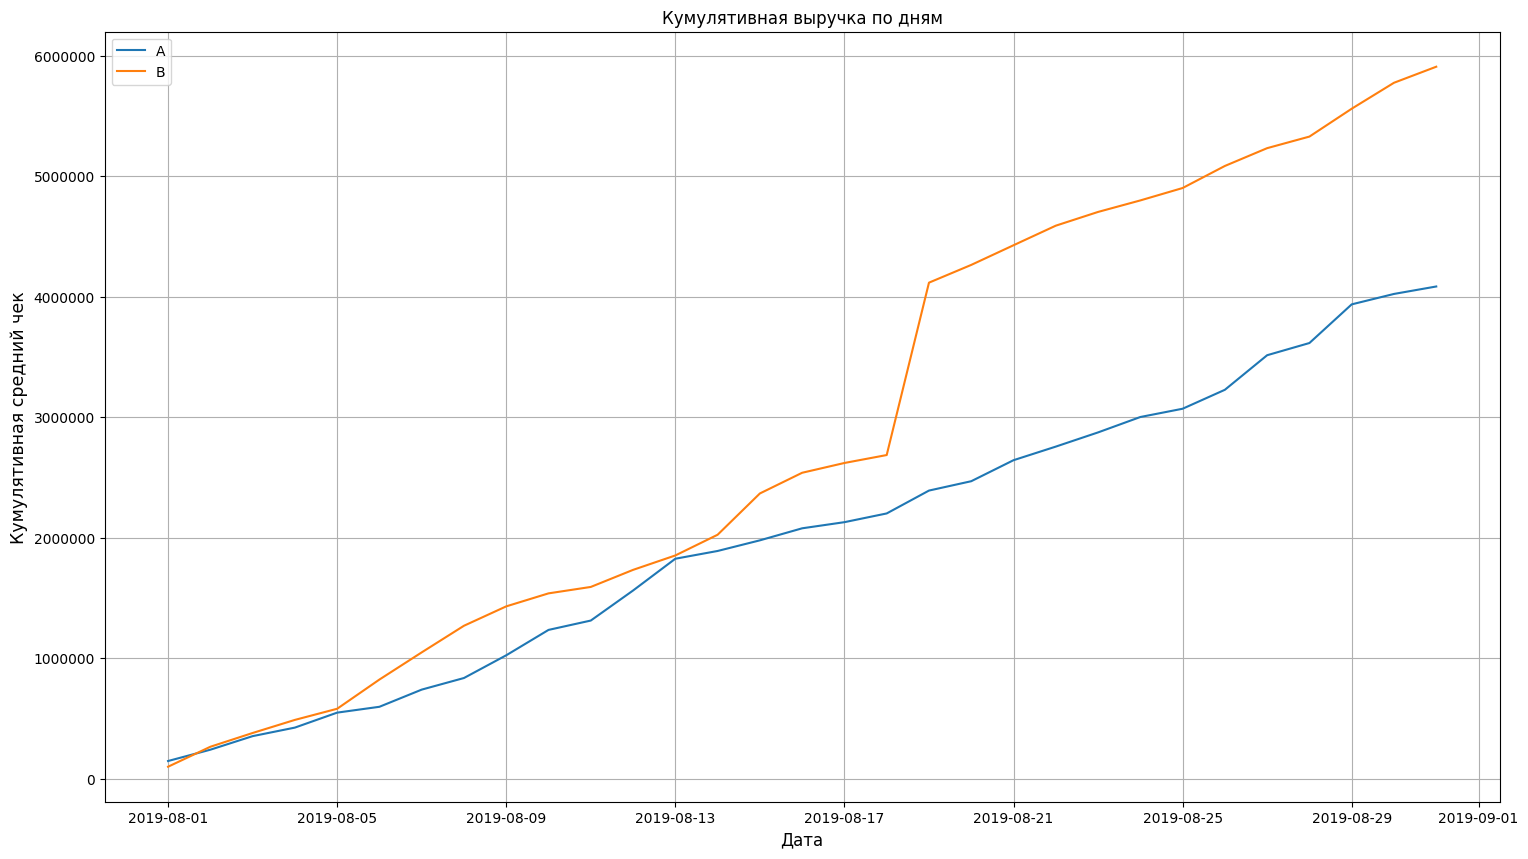

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.title('Кумулятивная выручка по дням')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная средний чек', fontsize=12.5)
plt.legend();

По графику видно, что обе группы идут равномерно, но 18 августа происходит резкий скачок в группе B. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Средний чек

Для каждой группы построим графики кумулятивного среднего чека по дням.

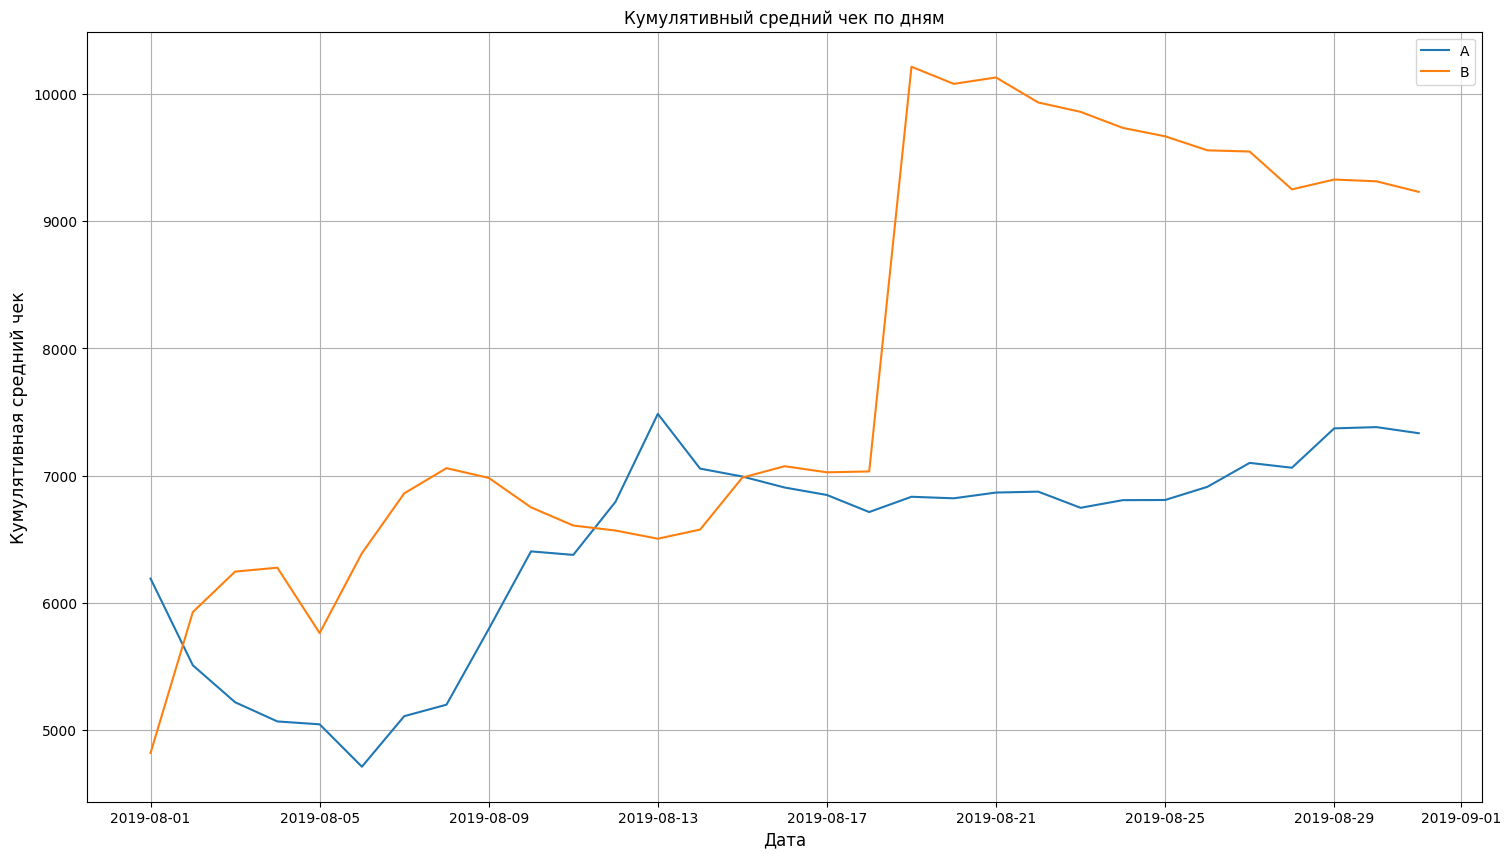

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.title('Кумулятивный средний чек по дням')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная средний чек', fontsize=12.5)
plt.legend();

Аналогичная ситуация ситуация наблюдается на протяжении почти всего теста - средний чек в группе B значительно опережает другую группу. Скорее всего действительно в данной группе присутствуют крупные заказы, т.к. в предобратке данных было видно, что количество заказов в группе B на `14,9%` больше по сравнению с группой A. Это говорит о том, что разница в количестве заказов не так велика, как средний чек.

#### Относительные изменения кумулятивного среднего между группами

Постройте график относительно различия кумулятивного среднего чека группы B к группе A.

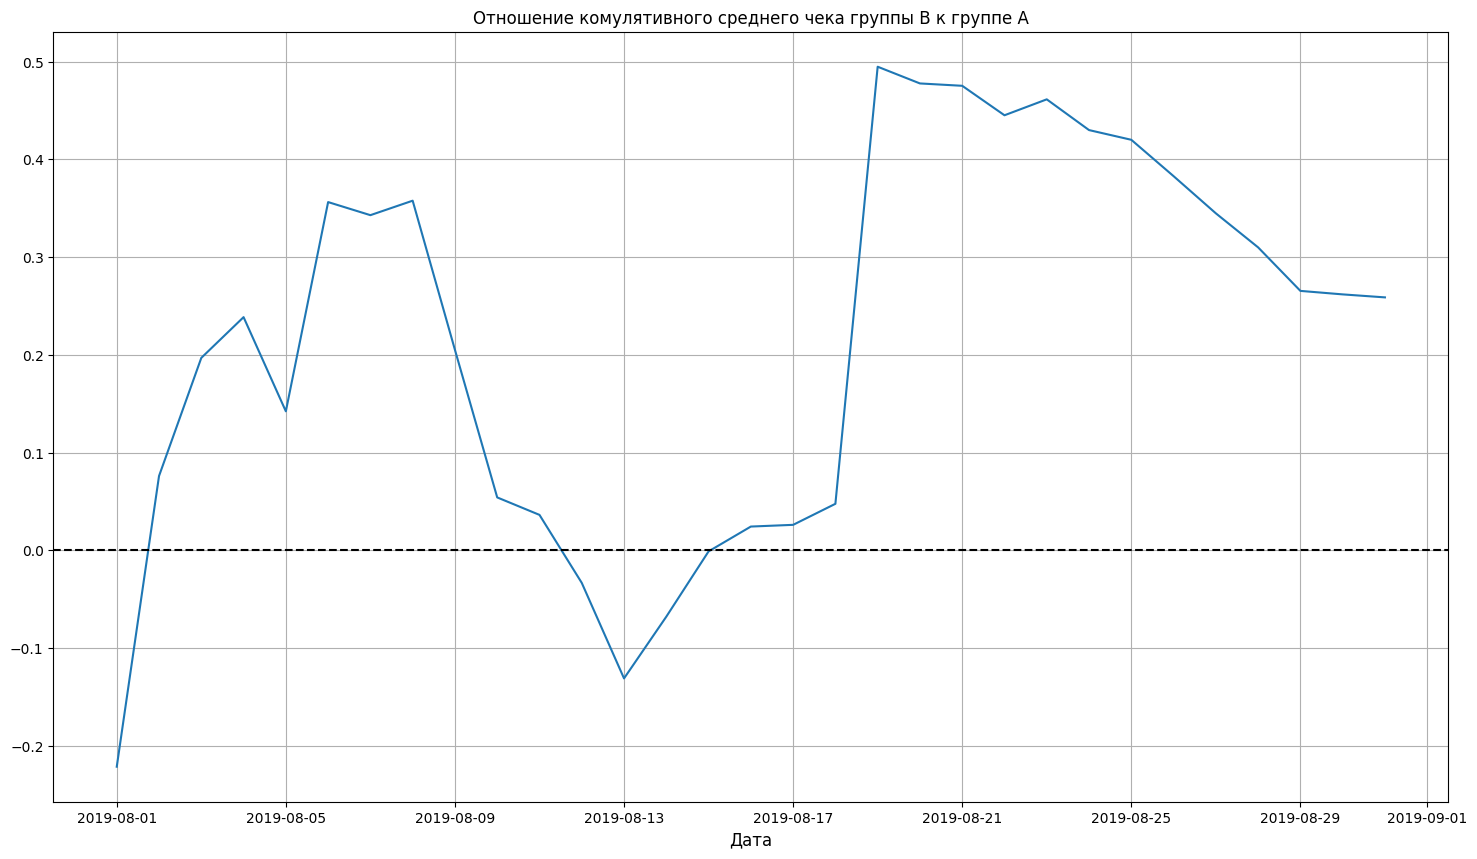

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('Отношение комулятивного среднего чека группы B к группе А')
plt.xlabel('Дата', fontsize=12);

Ранее сказанные слова подтвердились, на графике видны неравномерные скачки роста и падения, которые лишь все больше подтверждают факт наличия крупных заказов.

#### Кумулятивное среднее количества заказов

Построим графики кумулятивного среднего количества заказов на посетителя по дням по группам.

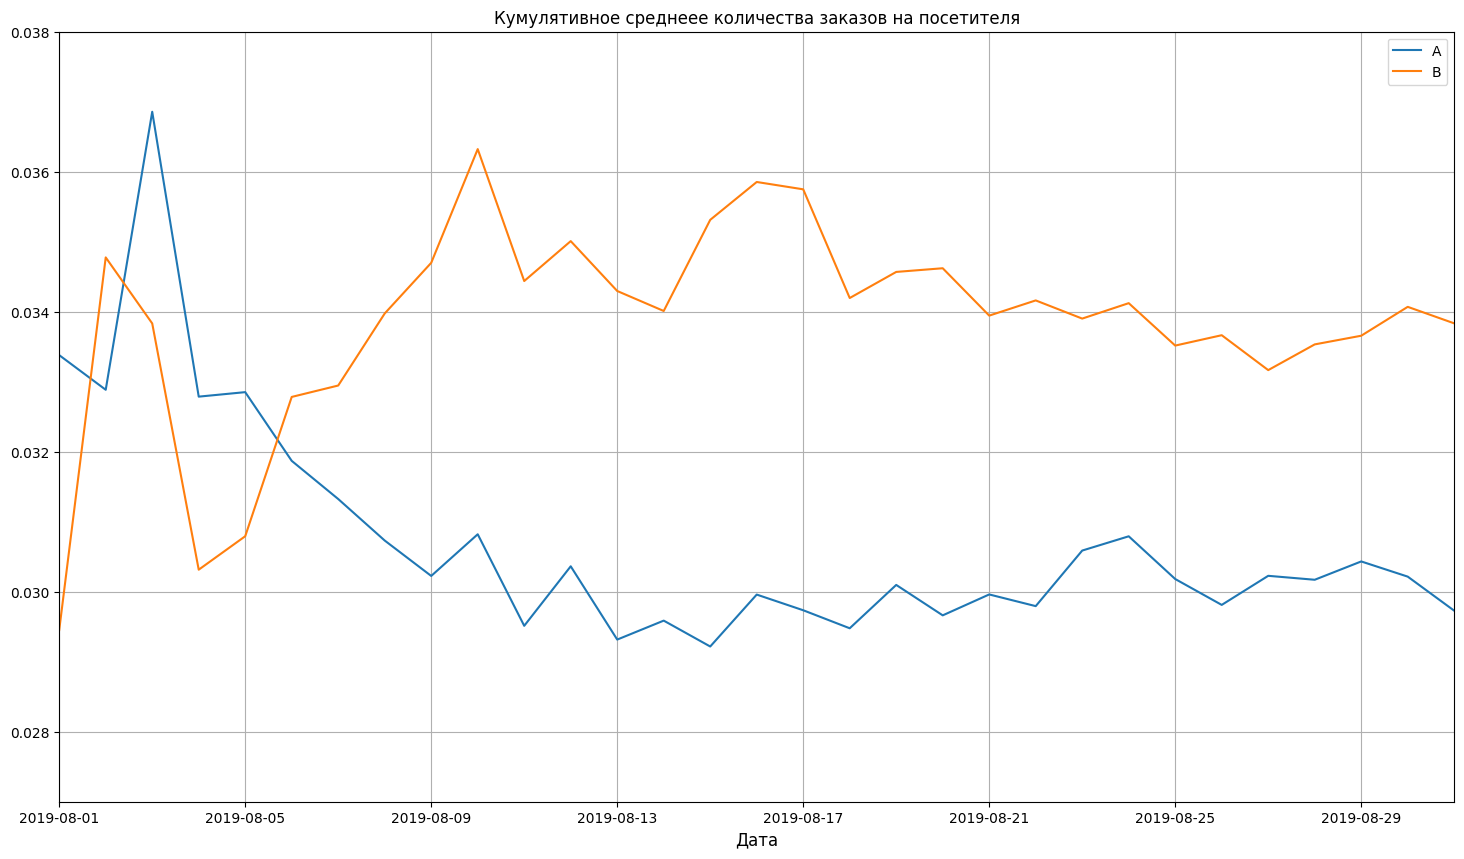

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.title('Кумулятивное среднеее количества заказов на посетителя')
plt.xlabel('Дата', fontsize=12)
plt.legend()

# задаем масштаб осей
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), 0.027, 0.038]);

График нельзя назвать симметричным, видно, что группы в начале колебались около нескольких значений, но затем среднее количество заказов группы B вырвалась вперёд и зафиксировалась, а среднее группы A просело и также зафиксировалась. Правда с уверенностью нельзя сказать, что среднее количество заказов действительно зафиксировались, т.к. в конца теста (последние 3 дня) в обоих группах наблюдается спад, возможно, что данный интернет-магазин специализируется на сезонных товарах или заказы в группе B носят сезонный характер. Рост в начале теста можно объяснить тем, что зачастую маркетинговые компании имеют рост конверсии как раз на стадии запуска.

#### Относительные изменения кумулятивного среднего количества заказов

Постройте график относительно различия кумулятивного среднего количества заказов группы B к группе A.

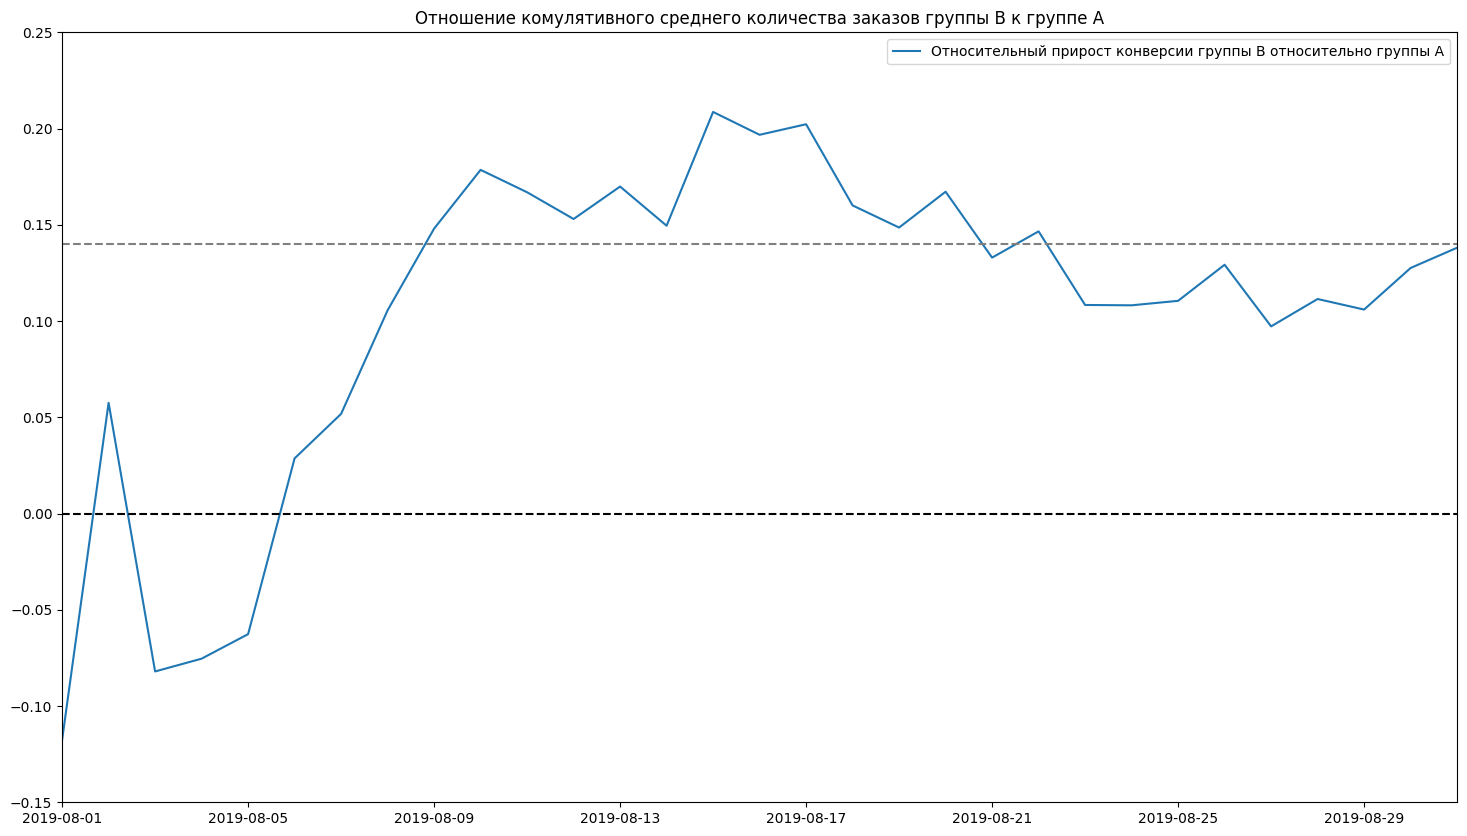

In [35]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Отношение комулятивного среднего количества заказов группы B к группе А')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), -0.15, 0.25]);

В начале теста группа B немного уступала группе А, затем вырвалась, но на 3-ей неделе немного начала уступать. Можно считать, что коэффициент среднего количества заказов стабилизировался — группа Б лучше, чем группа А.  
В целом отношение среднего количества заказов ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

### Анализ выбросов и всплесков

#### Количество заказов по пользователям

Изучим данные о заказах. Для начала создадим сводную таблицу, в которой будет видно количество заказов на одного пользователя.

In [36]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


По сводоной таблице трудно что-то понять, поэтому визуализируем ее с помощью столбчатой диаграммы.

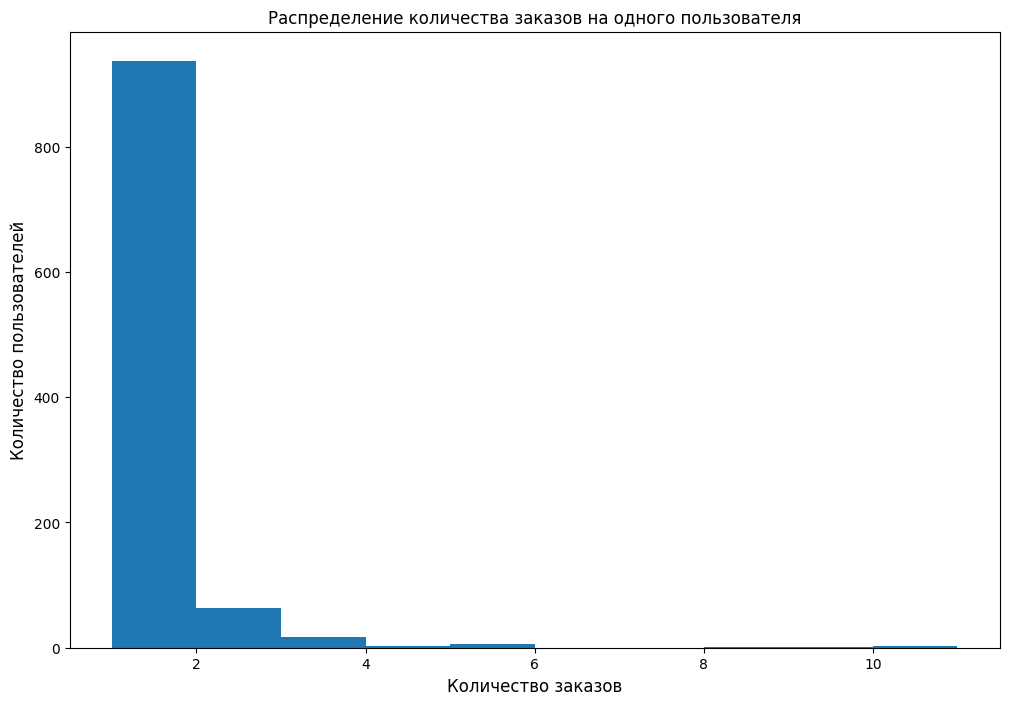

In [37]:
plt.figure(figsize=(12,8))
plt.hist(orders_by_users['orders'])
plt.title('Распределение количества заказов на одного пользователя')
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Количество заказов', fontsize=12)
plt.show()

В данных явно есть более 2 заказов на одного пользователя, однако большинство всё-таки имеет по 1 заказу.

Оценим количество заказов ещё одним способом:

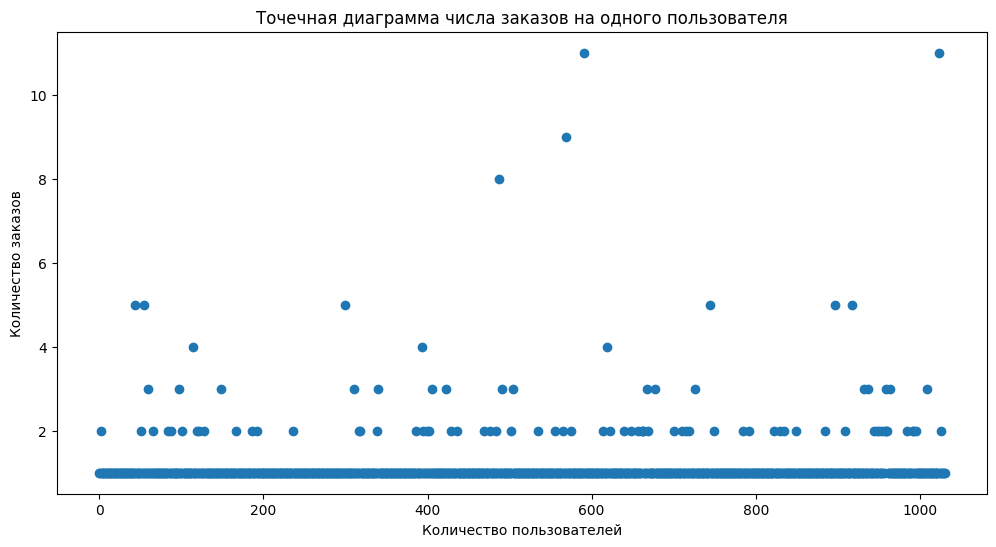

In [38]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show()

Преобладают пользователи которые совершили 1 заказ, пользователей с 2 заказами уже не так много, тех, кто совершил 3 заказа совсем мало, и считать ли это выбросами пока трудно сказать - нужно посчитать процентили (95 и 99). Можно лишь сказать, что пользователи с более 3-х заказов - это аномалии.

#### Определение перцентилей количества заказов

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [39]:
percentiles_for_orders = np.percentile(orders_by_users['orders'], [90, 95, 99])
print(percentiles_for_orders)

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Стоимость заказов

Оценим стоимость заказов с помощью точечного графика:

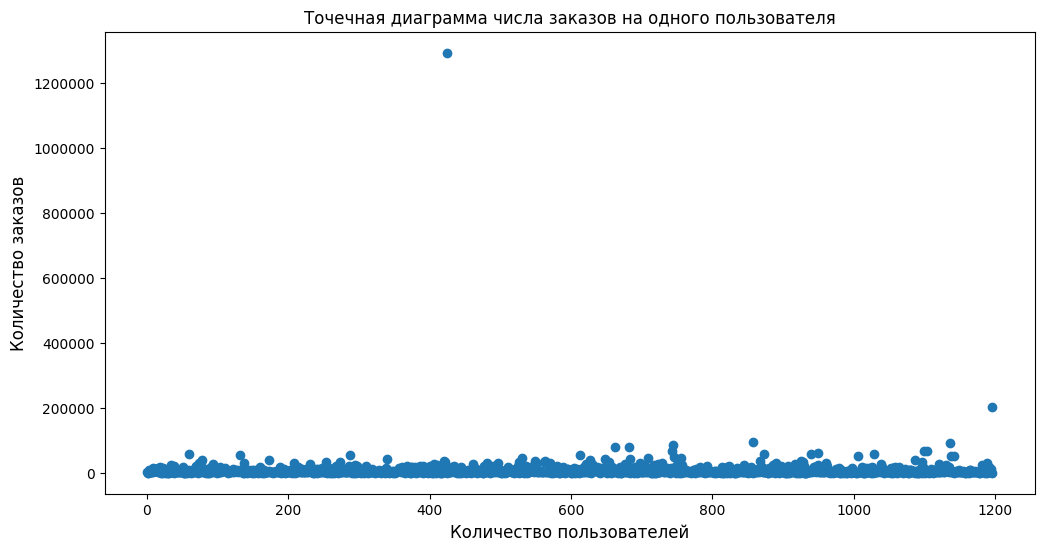

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Количество пользователей', fontsize=12)
plt.show()

In [41]:
orders['revenue'].describe()

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

Немного ограничим интервал по оси y, т.к. трудно что-то разобрать и явно есть аномалии.

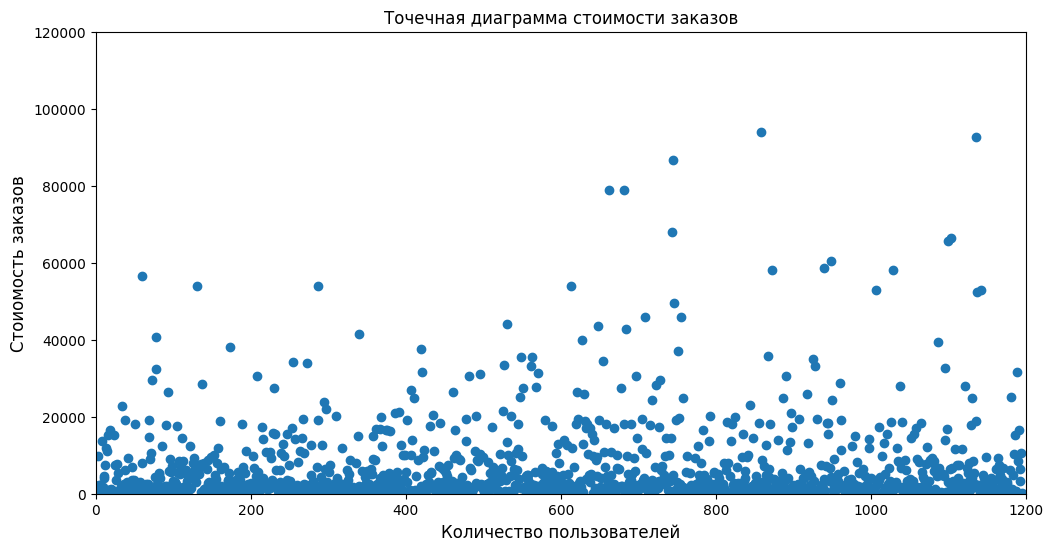

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 120000])
plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоиомость заказов', fontsize=12)
plt.xlabel('Количество пользователей', fontsize=12)
plt.show()

По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Определение перцентилей стоимости заказов

Посчитаем выборочные перцентили стоимости заказов:

In [43]:
percentiles_for_revenue = np.percentile(orders['revenue'], [90, 95, 99])
print(percentiles_for_revenue)

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 234 рублей.
Установим сумму 28 000 рубля за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

### Статистическая значимость по  «сырым» данным

В рамках данного проекта в качестве `alpha` (порогового уровеня статистической значимости) будет принято значение в размере 5% (0.05). В качестве метода для проверки гипотез будет использован U-критерий Манна — Уитни.

#### Различие в среднем количестве заказов на посетителя между группами

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Начнём с подготовки данных.

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['user_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [46]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1`. Применим критерий, отформатируем p-value и округлим до трёх знаков после запятой.

In [47]:
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


`p-value = 0.017` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Это говорит нам о том, что по «сырым» данным различия в конверсии групп A и B есть. Относительный выигрыш группы B над A равен `13.8%`.

#### Различия в среднем чеке заказа между группами

Сформулируем гипотезы. Нулевая: различий в среднем чека заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть.

In [48]:
revenueA = orders[orders['group'] == 'A']["revenue"]
revenueB = orders[orders['group'] == 'B']["revenue"]
print("p-value:{0:.3f}".format(st.mannwhitneyu(revenueA, revenueB)[1]))

print("Относительное изменение среднего чека заказов группы B: {0:.3f}".format(revenueB.mean() / revenueA.mean() - 1))

p-value:0.729
Относительное изменение среднего чека заказов группы B: 0.259


`p-value = 0.729` значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в в среднем чеке заказа между группами нет, не отвергаем. Это говорит нам о том, что по «сырым» данным различия в средних чеках заказа групп A и B есть. Относительный выигрыш группы B над A равен `25.9%`.

### Статистическая значимость по «очищенным» данным

Напомним, что найденные в прошлых шагах 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. А 95-й и 99-й перцентили средних чеков равны 28 000 и 58 234 рублям.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentiles_for_orders[1]]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > percentiles_for_orders[1]]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentiles_for_revenue[1]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователя.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

In [50]:
print("Количество заказов с суммой вышее 95 перцентили:", len(orders.query("revenue > 28000")))

Количество заказов с суммой вышее 95 перцентили: 60


In [51]:
print("Количество заказов с суммой вышее 99 перцентили:", len(orders.query("revenue > 58234")))

Количество заказов с суммой вышее 99 перцентили: 12


#### Различие в среднем количестве заказов на посетителя между группами

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем между группами есть.

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [52]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [53]:
print('P-value: {0:f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B после очистки данных: {0:f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013043
Относительный прирост конверсии группы B после очистки данных: 0.172701


Значение p-value меньше критического уровеня статистической значимости, поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Относительный прирост группы B составил: `17,27%`.

#### Различия в среднем чеке заказа между группами

Произошло ли что-нибудь с результатами по среднему чеку?

Сформулируем гипотезы. Нулевая: различий в среднем чека заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть.

In [54]:
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное изменение среднего чека заказов группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Относительное изменение среднего чека заказов группы B: -0.020


Значение p-value значительно больше 0.05, поэтому причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B стал ниже среднего чека группы A, это лишь является доказательством того, что влияние выбросов более заметно.

### Вывод

Группа B явно лидирует как по кумулятивным метрикам, так и в статистической значимости по «сырым» данным.

После очистки данных можно сделать вывод, что выбросы влияют на результаты теста, так показатели группы B по отношению к группе А, особенно это видно в средних чеках заказа - они ушли в минус.

### Решение по проведеннному A/B-тесту

Какие выводы по тесту можем сделать?

Имеющиеся факты:
- Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B;
- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, т.к. посетители чаще меняют свой статус на покупателя, т.е. переходят от просмотра товара к покупкам.

Из этих фактов следует, что группа B победила, поэтому тест можно остановить.